2. As in the logistic regression tut, we will generate our own data to train a neural network. This time, we will generate data in the region [0, 1]^2 with a complicated decision boundary. In python, perform the following tasks:

(a)	Define the function f (x) = x^2 sin(2πx) + 0.7.

(b)	Generate a uniform random point (x1, x2) = [0, 1]^2. Associate with this point the class 0 if f (x1) > x2, and class 1 otherwise.

(c)	Generate 100 points in this way. Plot them with different symbols for the two classes.

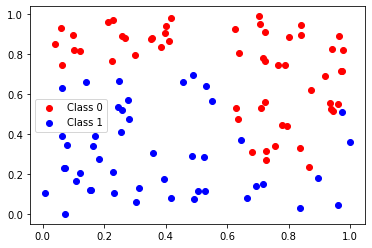

In [51]:
import numpy as np
import matplotlib.pyplot as plt

#function f(x)
def f(x):
    return x**2 * np.sin(2*np.pi*x) + 0.7

#generate uniform random points and assign classes
n_points = 100
x1 = np.random.uniform(0, 1, n_points)
x2 = np.random.uniform(0, 1, n_points)
y = (f(x1) > x2).astype(int)
points = np.column_stack((x1, x2, y))

#plot the two classes
class0 = points[points[:, 2] == 0]
class1 = points[points[:, 2] == 1]
plt.scatter(class0[:, 0], class0[:, 1], color='red', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1')
plt.legend()
plt.show()

3. For this question, use the dataset you generated for question 2 above. We are now going to train a neural network model to classify this data.

(a)	First we need to choose an architecture for the network. This data is 2D, in x1 and x2. We therefore need two input parameters for the model, and one output variable. It is a classification problem, so we can choose the final activation function to be a sigmoid. We know the decision boundary is non-linear because we made the data – otherwise we may need to visualise some of it to figure this out, and so we need at least one hidden layer. Let’s use three nodes on the hidden layer, and sigmoids for all activation functions.

(b)	Implement forward propagation for this network. Do this is a vectorised way, so we can generalise to different architectures. For any input vector, we need a vector of activations at every layer.

(c)	Now compute the error δ at the final layer as the difference between the final activation and the target.

(d)	Moving backwards through the layers, compute the δ of each layer (in this case this would just be for the hidden layer).

(e)	Given the activations and δs, compute the gradients for each parameter. 

(f) Finally, perform a weight update. Use the learning rate of α = 0.1.

(g)	Repeat the update in a loop. Technically there are two nested loops: for each epoch (iteration of the outer loop) we run through all our data points and update the weights. We then usually use two terminating conditions on the outer loop: the first is to look at the normed difference between the parameter vector between two successive iterations and we terminate when this is small, i.e. ||θnew - θold|| < ϵ, with ϵ = 0.05. We also usually set a maximum number of epochs, e.g. 1000, just in case. Run the learning until convergence. What is the error on the training data?

(h)	Generate 100 more datapoints from the procedure in question 2. This will be our validation data. Classify them using your trained model and tabulate the results in a confusion matrix. Compare the error on the training data to the error on the validation data. What do you notice?

(i)	Change the hyperparameters. Before, we considered changing the learning rate α and termination threshold ϵ. Now try add another node or two to the hidden layer, and even add in a second hidden layer. For each different setting of the hyperparameters, retrain your model on the training data and evaluate it on the validation data.

(j)	Keep the best values of your hyperparameters. Now generate 100 more datapoints. This will be our testing data. Classify them using your trained model and tabulate the results in a confusion matrix. This is the final performance of the classifier with optimised hyperparameters!

(k)	Why is it important to have the three data sets: training, validation, and testing?